In [1]:
!pip install datasets transformers huggingface_hub torchaudio librosa jiwer evaluate

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import IPython.display as ipd
import urllib.request as urllib2
import ipywidgets as widgets
import json
import transformers
import re
import requests, zipfile, io, os
import numpy as np
import pandas as pd

from transformers import pipeline
from os import listdir
from os import listdir
from evaluate import load
from datasets import load_dataset, load_metric, Audio
from datasets import Audio


In [3]:
# test a huggingface model from a list of wavefiles, a filepath, and the model's path in The Hub
# returns a list with the transcriptions

def testHugModelwavlist1(wavelist, filepath, hfmodelname):
  # set pipe with target task
  task = "automatic-speech-recognition"
  hfmodel = hfmodelname
  pipe = pipeline(task, hfmodel)

  stranscription = []

  # Process wavfiles
  for fname in wavelist:
    transcription = pipe(filepath+fname)
    stranscription.append(transcription['text'])

  return stranscription

In [4]:
def extractWavFile(basedir):
  wavefilenames_temp = listdir(basedir)
  wavefilenames_temp = sorted(wavefilenames_temp)
  # in mac system, there exists a hidden file starts with a dot '.', so, this line of code used to filter this file out
  wavefilenames_temp = [filename for filename in wavefilenames_temp if not (filename.startswith('.'))]

  wavefilenames_temp = [filename for filename in wavefilenames_temp if os.path.isfile(os.path.join(basedir, filename))]
  return wavefilenames_temp

In [5]:
# test a huggingface model from a list of wavefiles, a filepath, and the model's path in The Hub
# returns a list with the transcriptions

def testHugModelwavlist(wavelist, filepath, hfmodelname):
  # set pipe with target task
  task = "automatic-speech-recognition"
  hfmodel = hfmodelname
  pipe = pipeline(task, hfmodel)

  stranscription = []

  # Process wavfiles
  for fname in wavelist:
    transcription = pipe(filepath+fname)
    stranscription.append(transcription['text'])

  return stranscription

In [7]:
##################################
## For reverberant audio #
##################################
# basedirs = ['./derev_Audio/chop_derev/']
# basedirs = ['./Rev_Audio/echo_Space4ArtGallery/',
#            './Rev_Audio/echo_CleftRidgeArch/',
#            './Rev_Audio/echo_concert_hall/',
#            './Rev_Audio/echo_RacquetballCourt/',
            
#            './Rev_Audio/clip_Space4ArtGallery/',
#             './Rev_Audio/clip_CleftRidgeArch/',
#             './Rev_Audio/clip_concert_hall/',
#             './Rev_Audio/clip_RacquetballCourt/',
            
#             './Rev_Audio/compspkr_Space4ArtGallery/',
#             './Rev_Audio/compspkr_CleftRidgeArch/',
#             './Rev_Audio/compspkr_concert_hall/',
#             './Rev_Audio/compspkr_RacquetballCourt/',

#             './Rev_Audio/noise_Space4ArtGallery/',
#             './Rev_Audio/noise_CleftRidgeArch/',
#             './Rev_Audio/noise_concert_hall/',
#             './Rev_Audio/noise_RacquetballCourt/',
#            ]



# basedirs = [
#             ['./Rev_Audio/echo_Space4ArtGallery1/',
#            './Rev_Audio/echo_CleftRidgeArch1/',
#            './Rev_Audio/echo_concert_hall1/',
#            './Rev_Audio/echo_RacquetballCourt1/'],

#             ['./Rev_Audio/compspkr_Space4ArtGallery1/',
#             './Rev_Audio/compspkr_CleftRidgeArch1/',
#             './Rev_Audio/compspkr_concert_hall1/',
#             './Rev_Audio/compspkr_RacquetballCourt1/'],
            
#            ['./Rev_Audio/clip_Space4ArtGallery1/',
#             './Rev_Audio/clip_CleftRidgeArch1/',
#             './Rev_Audio/clip_concert_hall1/',
#             './Rev_Audio/clip_RacquetballCourt1/'],

#             ['./Rev_Audio/noise_Space4ArtGallery1/',
#             './Rev_Audio/noise_CleftRidgeArch1/',
#             './Rev_Audio/noise_concert_hall1/',
#             './Rev_Audio/noise_RacquetballCourt1/'],
#            ]


basedirs = [
            ['./Noised_Audio/echo_machines/',
           './Noised_Audio/echo_sports/',
           './Noised_Audio/echo_boeing/',
           './Noised_Audio/echo_crowded/'],

             ['./Noised_Audio/compspkr_boeing/',
            './Noised_Audio/compspkr_crowded/',
            './Noised_Audio/compspkr_machines/',
            './Noised_Audio/compspkr_sports/'],

    
           ['./Noised_Audio/clip_boeing/',
            './Noised_Audio/clip_crowded/',
            './Noised_Audio/clip_machines/',
            './Noised_Audio/clip_sports/'],
            
           
            ['./Noised_Audio/noise_boeing/',
            './Noised_Audio/noise_crowded/',
            './Noised_Audio/noise_machines/',
            './Noised_Audio/noise_sports/'],
           ]

dftranscriptions_all = pd.DataFrame()

for basedir in basedirs:
    my_list = []
    directory_name_list = []
    for dir in basedir:
        print('dir = ', dir)
        all_wavefilenames = extractWavFile(dir)
        dftranscriptions_assign1 = pd.DataFrame(columns = ['file'])
        dftranscriptions_assign1['file'] = all_wavefilenames
        print(len(all_wavefilenames))
        
        last_part = os.path.basename(dir.strip('/'))
        if 'echo_' in last_part:
            directory_name = last_part.replace('echo_', '')
        if 'clip_' in last_part:
            directory_name = last_part.replace('clip_', '')
        if 'compspkr_' in last_part:
            directory_name = last_part.replace('compspkr_', '')
        if 'noise_' in last_part:
            directory_name = last_part.replace('noise_', '')
    
        directory_name_list.append(directory_name)
        stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], dir, 'microsoft/speecht5_asr')
        # dftranscriptions_assign1['sst_speecht5_asr'] = stt
        
        # stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], dir, 'openai/whisper-small')
        
        my_list.append(stt)
        
        # stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], basedir, 'openai/whisper-base.en')
        # dftranscriptions_assign1['stt_whisper-base'] = stt
        
        # stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], basedir, 'facebook/data2vec-audio-base-100h')
        # dftranscriptions_assign1['stt_data2vec-audio-base'] = stt
        
        # stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], basedir, 'facebook/wav2vec2-base-960h')
        # dftranscriptions_assign1['stt_wav2vec2-base'] = stt
    for ele, name in zip(my_list, directory_name_list):
        print('directory_name = ', name)
        dftranscriptions_assign1[name] = ele
    # print(dftranscriptions_assign1)
    dftranscriptions_all = pd.concat([dftranscriptions_all, dftranscriptions_assign1], ignore_index=True)
    # dftranscriptions_all = dftranscriptions_all.append(dftranscriptions_assign1, ignore_index=True)
# print(len(all_wavefilenames))
print(dftranscriptions_all)

# all_wavefilenames


dir =  ./Noised_Audio/echo_machines/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/echo_sports/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/echo_boeing/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/echo_crowded/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

directory_name =  machines
directory_name =  sports
directory_name =  boeing
directory_name =  crowded
dir =  ./Noised_Audio/compspkr_boeing/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/compspkr_crowded/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/compspkr_machines/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/compspkr_sports/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

directory_name =  boeing
directory_name =  crowded
directory_name =  machines
directory_name =  sports
dir =  ./Noised_Audio/clip_boeing/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/clip_crowded/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/clip_machines/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/clip_sports/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

directory_name =  boeing
directory_name =  crowded
directory_name =  machines
directory_name =  sports
dir =  ./Noised_Audio/noise_boeing/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/noise_crowded/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/noise_machines/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./Noised_Audio/noise_sports/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

directory_name =  boeing
directory_name =  crowded
directory_name =  machines
directory_name =  sports
                         file  \
0     R_01_ECHO_FA_Noised.wav   
1     R_01_ECHO_FG_Noised.wav   
2     R_01_ECHO_MK_Noised.wav   
3     R_01_ECHO_ML_Noised.wav   
4     R_02_ECHO_FA_Noised.wav   
..                        ...   
299  R_23_NOISE_ML_Noised.wav   
300  R_24_NOISE_FA_Noised.wav   
301  R_24_NOISE_FG_Noised.wav   
302  R_24_NOISE_MK_Noised.wav   
303  R_24_NOISE_ML_Noised.wav   

                                              machines  \
0           the colt reared and drew the tall rider on   
1    grace makes up for lack of beauty grace makes ...   
2                a gold vace is both rare and cuthbert   
3    to set the lamp firmly on the home beside to s...   
4             the girl at the booth showed fifty bonds   
..                                                 ...   
299                              to strike heavy blows   
300            the ship was torn apa

In [8]:
import pandas as pd
import chardet    
df = pd.read_csv('./final_file_final.csv')
references = []

# iterate each row of DataFrame
for index, row in df.iterrows():
    # concatenate utterance1 and utterance2
    # concatenated_utterance = f"{row['utterance1']} {row['utterance2']}"
    concatenated_utterance = f"{row['transcription']}"
    # add results to references
    references.append(concatenated_utterance)
# references
# reference
dftranscriptions_all['references'] = references
dftranscriptions_all

,file,machines,sports,boeing,crowded,references
0,R_01_ECHO_FA_Noised.wav,the colt reared and drew the tall rider on,the colt reared and threw the tall rider,the cold reared and true the tall rider,the plains reared and threw the tar rider,The colt reared and threw the tall rider.
1,R_01_ECHO_FG_Noised.wav,grace makes up for lack of beauty grace makes ...,grace makes up for lacker he oh,grace makes up for lack of beauty grace makes ...,raise me up for lack of beauty raise me up for...,Grace makes up for lack of beauty.
2,R_01_ECHO_MK_Noised.wav,a gold vace is both rare and cuthbert,a golden vace is both rare and costly,a gold vace is both rare and coffee,a good and apt was both rare and tougher a goo...,A gold vase is both rare and costly.
3,R_01_ECHO_ML_Noised.wav,to set the lamp firmly on the home beside to s...,fermain hohaco hard,to set the lamp firmly in the hole beside the ...,besure i set the lamp firmly on the hearth bes...,Be sure to set the lamp firmly in the hole.
4,R_02_ECHO_FA_Noised.wav,the girl at the booth showed fifty bonds,the girl at the boofs are fifty bonds,the girl at the booth sold fifty bonds,the grudge of ruth's own fifty bonds,The girl at the booth sold fifty bonds.
...,...,...,...,...,...,...
299,R_23_NOISE_ML_Noised.wav,to strike heavy blows,the stray heavy blows,our troops are set to strike heavy blows,our troops are set to strike heavy blows,Our troops are set to strike heavy blows.
300,R_24_NOISE_FA_Noised.wav,the ship was torn apart on a sharp reef,the ship was torn apart on a sharp rain,the ship was torn apart on the sharp reef,the ship are torn apart of a sharp roof,The ship was torn apart on the sharp reef.
301,R_24_NOISE_FG_Noised.wav,raised the sail and feared the ship northward,raised the sail and feared the ship northward aha,raised the sail and flew the ship northward,raised the sail and fear the ship northward ra...,Raise the sail and steer the ship northward.
302,R_24_NOISE_MK_Noised.wav,the rarest bice comes from the parting,the rarest bice comes from our bartons,the rarest bice comes from the far east,the rarest fight comes from the farthing the r...,The rarest spice comes from the far East.


In [9]:
def computeWERdf_separate(df, models):
    # dfscores = pd.DataFrame(columns = ['file', 'sst_speecht5_asr', 'stt_whisper-small', 'stt_whisper-base', 'stt_data2vec-audio-base', 'stt_wav2vec2-base'])
    dfscores = pd.DataFrame(columns = ['file'] + models)
    file_names = []
    wer = load("wer")
    dfscores['file'] = df['file']
        
    for model in models:
        wer_scores = []
        for i in range(len(df)):
            predictions = [df.loc[i, model]] 
            references = [df.loc[i, "references"]] 
            wer_score = wer.compute(predictions=predictions, references=references)
            wer_scores.append(wer_score)
        dfscores[model] = wer_scores
    return dfscores


In [39]:
# ##################################
# ## This calculates WER for EACH .csv file of each model BEFORE any issues are solved(e.g. case sensitivity issue)  #
# ##################################
# from evaluate import load
# # WER_result_before_fixed_separate = computeWERdf_separate(dftranscriptions_all,['sst_speecht5_asr', 'stt_whisper-small', 'stt_whisper-base','stt_data2vec-audio-base', 'stt_wav2vec2-base'])
# WER_result_before_fixed_separate = computeWERdf_separate(dftranscriptions_all,['machines', 'sports', 'boeing', 'crowded'])

# WER_result_before_fixed_separate

In [11]:
##################################
## Solve issues #
##################################
import re
issues_solved_WER = pd.DataFrame()
issues_solved_WER = dftranscriptions_all.copy()
def make_sentence_first_letter_uppercase(text):
    # split the sentence, '.', '?', '!' are assumed to be split symbol here
    sentences = re.split(r'(?<=[.?!]) +', text)
    # make the first letter of each sentence uppercase
    sentences_capitalized = [sentence[0].upper() + sentence[1:] if sentence else '' for sentence in sentences]
    # reconnect each sentence
    return ' '.join(sentences_capitalized)


# Change to lowercase columns for stt_data2vec-audio-base & stt_wav2vec2-base models
# issues_solved_WER['stt_data2vec-audio-base'] = issues_solved_WER['stt_data2vec-audio-base'].str.lower()
# issues_solved_WER['stt_wav2vec2-base'] = issues_solved_WER['stt_wav2vec2-base'].str.lower()

# make sure the first letter of each sentence is uppercase
issues_solved_WER['machines'] = issues_solved_WER['machines'].apply(make_sentence_first_letter_uppercase)
issues_solved_WER['sports'] = issues_solved_WER['sports'].apply(make_sentence_first_letter_uppercase)
issues_solved_WER['boeing'] = issues_solved_WER['boeing'].apply(make_sentence_first_letter_uppercase)
issues_solved_WER['crowded'] = issues_solved_WER['crowded'].apply(make_sentence_first_letter_uppercase)

In [20]:
##################################
## This calculates WER for EACH .csv file of each model AFTER any issues are solved(e.g. case sensitivity issue)  #
##################################
# compute WER again  dftranscriptions_all
WER_result_fixed_separate = computeWERdf_separate(issues_solved_WER,['machines', 'sports', 'boeing', 'crowded'])
WER_result_fixed_separate

,file,machines,sports,boeing,crowded
0,R_01_ECHO_FA_Noised.wav,0.375000,0.125000,0.375000,0.375000
1,R_01_ECHO_FG_Noised.wav,2.142857,0.428571,2.142857,2.428571
2,R_01_ECHO_MK_Noised.wav,0.250000,0.375000,0.250000,1.750000
3,R_01_ECHO_ML_Noised.wav,1.800000,1.000000,1.800000,1.300000
4,R_02_ECHO_FA_Noised.wav,0.250000,0.375000,0.125000,0.750000
...,...,...,...,...,...
299,R_23_NOISE_ML_Noised.wav,0.750000,0.875000,0.125000,0.125000
300,R_24_NOISE_FA_Noised.wav,0.222222,0.222222,0.111111,0.444444
301,R_24_NOISE_FG_Noised.wav,0.375000,0.500000,0.375000,2.375000
302,R_24_NOISE_MK_Noised.wav,0.375000,0.500000,0.250000,1.125000


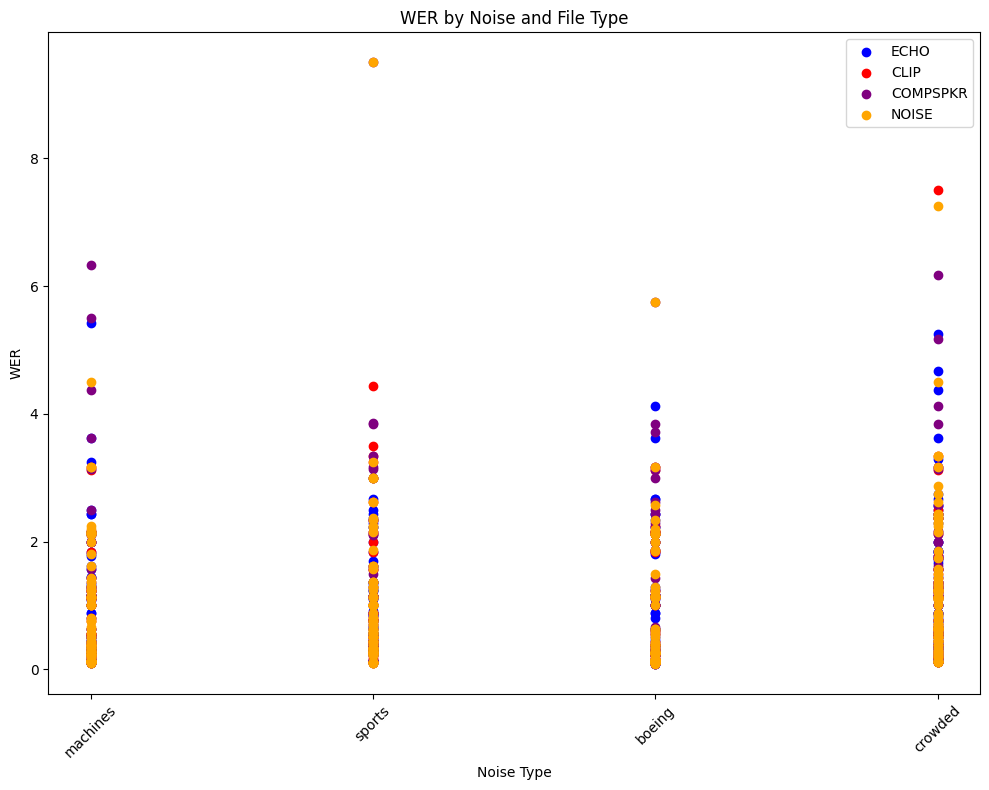

In [47]:
import matplotlib.pyplot as plt  # 导入matplotlib.pyplot

color_dict = {
    'ECHO': 'blue',
    'CLIP': 'red',
    'COMPSPKR': 'purple',
    'NOISE': 'orange'
}


# df = WER_result_before_fixed_separate.copy()
df = WER_result_fixed_separate.copy()

WER_THRESHOLD = 100  

df['file_type'] = df['file'].apply(lambda x: x.split('_')[2])


fig, ax = plt.subplots(figsize=(10, 8))


for model in df.columns[1:-1]:  
    for file_type, color in color_dict.items():
        subset = df[(df['file_type'] == file_type) & (df[model] <= WER_THRESHOLD)]
        # subset = df[df['file_type'] == file_type]
        ax.scatter([model] * len(subset), subset[model], label=file_type, color=color_dict[file_type])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())


ax.set_xlabel('Noise Type')
ax.set_ylabel('WER')
ax.set_title('WER by Noise and File Type')


plt.xticks(rotation=45)  # Rotate model names for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


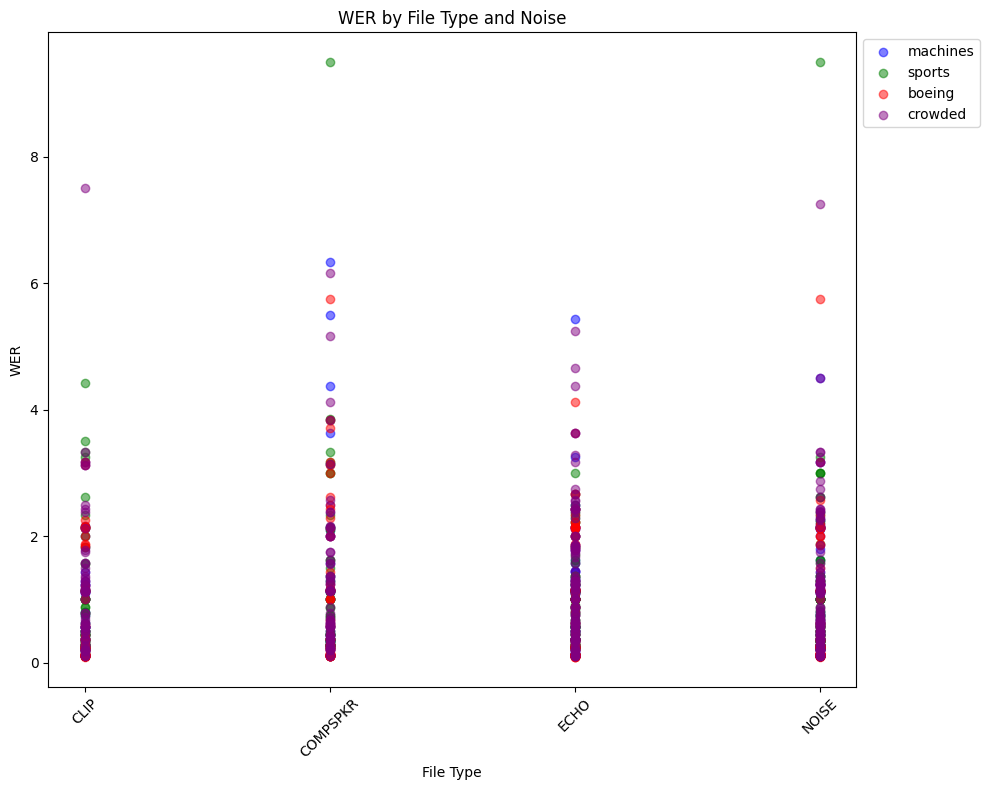

In [48]:
model_colors = {
    'machines': 'blue',
    'sports': 'green',
    'boeing': 'red',
    'crowded': 'purple'
}

fig, ax = plt.subplots(figsize=(10, 8))


grouped = df.groupby('file_type')
WER_THRESHOLD = 100  


for file_type, group in grouped:
    
    for model in df.columns[1:-1]: 
        subset = group[group[model] <= WER_THRESHOLD]
        ax.scatter([file_type] * len(subset), subset[model], label=model, alpha=0.5, color=model_colors[model])
        # ax.scatter([file_type] * len(group), group[model], label=model, alpha=0.5, color=model_colors[model])


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))


ax.set_xlabel('File Type')
ax.set_ylabel('WER')
ax.set_title('WER by File Type and Noise')

plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


In [23]:
# computes the WER for a list of models (columns) over a dataframe
# returns a dataframe with WER scores for each model in the list
def computeWERdf_total(df, models):
  dfscores = pd.DataFrame(columns = ['model', 'WER'])
  dfscores['model'] = models
  # load metric
  wer = load("wer")
  wer_scores = []
  for model in models:
    predictions = df[model]
    references = df["references"]
    wer_scores.append(wer.compute(predictions=predictions, references=references))

  dfscores['WER'] = wer_scores
  return dfscores

In [51]:
# ##################################
# ## This calculates WER for EACH .csv file of each model BEFORE any issues are solved(e.g. case sensitivity issue)  #
# ##################################
# from evaluate import load
# WER_result_before_fixed_separate = computeWERdf_total(dftranscriptions_all,['machines', 'sports', 'boeing', 'crowded'])
# # WER_result_before_fixed_separate = computeWERdf_total(dftranscriptions_all,['machines', 'sports', 'boeing', 'crowded'])

# WER_result_before_fixed_separate

In [41]:
##################################
## This calculates WER for EACH .csv file of each model BEFORE any issues are solved(e.g. case sensitivity issue)  #
##################################
from evaluate import load
WER_result_after_fixed_separate = computeWERdf_total(issues_solved_WER,['machines', 'sports', 'boeing', 'crowded'])
# WER_result_before_fixed_separate = computeWERdf_total(issues_solved_WER,['machines', 'sports', 'boeing', 'crowded'])

WER_result_after_fixed_separate

,model,WER
0,machines,0.866721
1,sports,0.957482
2,boeing,0.764105
3,crowded,1.129191


In [18]:
##################################
## For dereverberant audio #
##################################
# basedirs = ['./derev_Audio/chop_derev/']
# basedirs = ['./Rev_Audio/echo_Space4ArtGallery/',
#            './Rev_Audio/echo_CleftRidgeArch/',
#            './Rev_Audio/echo_concert_hall/',
#            './Rev_Audio/echo_RacquetballCourt/',
            
#            './Rev_Audio/clip_Space4ArtGallery/',
#             './Rev_Audio/clip_CleftRidgeArch/',
#             './Rev_Audio/clip_concert_hall/',
#             './Rev_Audio/clip_RacquetballCourt/',
            
#             './Rev_Audio/compspkr_Space4ArtGallery/',
#             './Rev_Audio/compspkr_CleftRidgeArch/',
#             './Rev_Audio/compspkr_concert_hall/',
#             './Rev_Audio/compspkr_RacquetballCourt/',

#             './Rev_Audio/noise_Space4ArtGallery/',
#             './Rev_Audio/noise_CleftRidgeArch/',
#             './Rev_Audio/noise_concert_hall/',
#             './Rev_Audio/noise_RacquetballCourt/',
#            ]

# basedirs = [
#             ['./derev_Audio/dev_echo_Space4ArtGallery1/',
#            './derev_Audio/dev_echo_CleftRidgeArch1/',
#            './derev_Audio/dev_echo_concert_hall1/',
#            './derev_Audio/dev_echo_RacquetballCourt1/'],

#             ['./derev_Audio/dev_compspkr_Space4ArtGallery1/',
#             './derev_Audio/dev_compspkr_CleftRidgeArch1/',
#             './derev_Audio/dev_compspkr_concert_hall1/',
#             './derev_Audio/dev_compspkr_RacquetballCourt1/'],
            
#            ['./derev_Audio/dev_clip_Space4ArtGallery1/',
#             './derev_Audio/dev_clip_CleftRidgeArch1/',
#             './derev_Audio/dev_clip_concert_hall1/',
#             './derev_Audio/dev_clip_RacquetballCourt1/'],

#             ['./derev_Audio/dev_noise_Space4ArtGallery1/',
#             './derev_Audio/dev_noise_CleftRidgeArch1/',
#             './derev_Audio/dev_noise_concert_hall1/',
#             './derev_Audio/dev_noise_RacquetballCourt1/'],
#            ]

# ===================== For Test =====================
# basedirs = [
#             ['./denoised_Audio/echo_machines1/',
#            './denoised_Audio/echo_sports1/',
#            './denoised_Audio/echo_boeing1/',
#            './denoised_Audio/echo_crowded1/'],

#              ['./denoised_Audio/compspkr_boeing1/',
#             './denoised_Audio/compspkr_crowded1/',
#             './denoised_Audio/compspkr_machines1/',
#             './denoised_Audio/compspkr_sports1/'],

    
#            ['./denoised_Audio/clip_boeing1/',
#             './denoised_Audio/clip_crowded1/',
#             './denoised_Audio/clip_machines1/',
#             './denoised_Audio/clip_sports1/'],
            
           
#             ['./denoised_Audio/noise_boeing1/',
#             './denoised_Audio/noise_crowded1/',
#             './denoised_Audio/noise_machines1/',
#             './denoised_Audio/noise_sports1/'],
#            ]

# ===================== Dir for power spectral subtraction =====================

basedirs = [
            ['./denoised_Audio/echo_machines/',
           './denoised_Audio/echo_sports/',
           './denoised_Audio/echo_boeing/',
           './denoised_Audio/echo_crowded/'],

             ['./denoised_Audio/compspkr_boeing/',
            './denoised_Audio/compspkr_crowded/',
            './denoised_Audio/compspkr_machines/',
            './denoised_Audio/compspkr_sports/'],

    
           ['./denoised_Audio/clip_boeing/',
            './denoised_Audio/clip_crowded/',
            './denoised_Audio/clip_machines/',
            './denoised_Audio/clip_sports/'],
            
           
            ['./denoised_Audio/noise_boeing/',
            './denoised_Audio/noise_crowded/',
            './denoised_Audio/noise_machines/',
            './denoised_Audio/noise_sports/'],
           ]


denoised_dftranscriptions_all = pd.DataFrame()

for basedir in basedirs:
    my_list = []
    directory_name_list = []
    for dir in basedir:
        print('dir = ', dir)
        all_wavefilenames = extractWavFile(dir)
        dftranscriptions_assign1 = pd.DataFrame(columns = ['file'])
        dftranscriptions_assign1['file'] = all_wavefilenames
        print(len(all_wavefilenames))
        
        last_part = os.path.basename(dir.strip('/'))
        if 'echo_' in last_part:
            directory_name = last_part.replace('echo_', '')
        if 'clip_' in last_part:
            directory_name = last_part.replace('clip_', '')
        if 'compspkr_' in last_part:
            directory_name = last_part.replace('compspkr_', '')
        if 'noise_' in last_part:
            directory_name = last_part.replace('noise_', '')
    
        directory_name_list.append(directory_name)
        stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], dir, 'microsoft/speecht5_asr')
        # dftranscriptions_assign1['sst_speecht5_asr'] = stt
        
        # stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], dir, 'openai/whisper-small')
        

        my_list.append(stt)
        
        # stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], basedir, 'openai/whisper-base.en')
        # dftranscriptions_assign1['stt_whisper-base'] = stt
        
        # stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], basedir, 'facebook/data2vec-audio-base-100h')
        # dftranscriptions_assign1['stt_data2vec-audio-base'] = stt
        
        # stt = testHugModelwavlist(all_wavefilenames[:len(all_wavefilenames)], basedir, 'facebook/wav2vec2-base-960h')
        # dftranscriptions_assign1['stt_wav2vec2-base'] = stt
    for ele, name in zip(my_list, directory_name_list):
        print('directory_name = ', name)
        dftranscriptions_assign1[name] = ele
    # print(dftranscriptions_assign1)
    denoised_dftranscriptions_all = pd.concat([denoised_dftranscriptions_all, dftranscriptions_assign1], ignore_index=True)
    # dftranscriptions_all = dftranscriptions_all.append(dftranscriptions_assign1, ignore_index=True)
# print(len(all_wavefilenames))
print(denoised_dftranscriptions_all)

# all_wavefilenames


dir =  ./denoised_Audio/echo_machines/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/echo_sports/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/echo_boeing/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/echo_crowded/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

directory_name =  machines
directory_name =  sports
directory_name =  boeing
directory_name =  crowded
dir =  ./denoised_Audio/compspkr_boeing/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/compspkr_crowded/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/compspkr_machines/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/compspkr_sports/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

directory_name =  boeing
directory_name =  crowded
directory_name =  machines
directory_name =  sports
dir =  ./denoised_Audio/clip_boeing/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/clip_crowded/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/clip_machines/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/clip_sports/
56


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

directory_name =  boeing
directory_name =  crowded
directory_name =  machines
directory_name =  sports
dir =  ./denoised_Audio/noise_boeing/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/noise_crowded/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/noise_machines/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

dir =  ./denoised_Audio/noise_sports/
96


Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

directory_name =  boeing
directory_name =  crowded
directory_name =  machines
directory_name =  sports
                                  file  \
0     R_01_ECHO_FA_Noised_enhanced.wav   
1     R_01_ECHO_FG_Noised_enhanced.wav   
2     R_01_ECHO_MK_Noised_enhanced.wav   
3     R_01_ECHO_ML_Noised_enhanced.wav   
4     R_02_ECHO_FA_Noised_enhanced.wav   
..                                 ...   
299  R_23_NOISE_ML_Noised_enhanced.wav   
300  R_24_NOISE_FA_Noised_enhanced.wav   
301  R_24_NOISE_FG_Noised_enhanced.wav   
302  R_24_NOISE_MK_Noised_enhanced.wav   
303  R_24_NOISE_ML_Noised_enhanced.wav   

                                              machines  \
0          the colt reared and sent the tower right on   
1    brace makes up for lack of beauty or honor bra...   
2    a golden face is both rare and coughed with tr...   
3                                          that's what   
4    the girl at the boof showed fifty bonnets expr...   
..                                          

In [25]:
import pandas as pd
import chardet    
df = pd.read_csv('./final_file_final.csv')

# df = pd.read_csv('./Test/transcriptions_test.csv')
references = []

# iterate each row of DataFrame
for index, row in df.iterrows():
    # concatenate utterance1 and utterance2
    # concatenated_utterance = f"{row['utterance1']} {row['utterance2']}"
    concatenated_utterance = f"{row['transcription']}"
    # add results to references
    references.append(concatenated_utterance)
# references
# reference
denoised_dftranscriptions_all['references'] = references
denoised_dftranscriptions_all

,file,machines,sports,boeing,crowded,references
0,R_01_ECHO_FA_Noised_enhanced.wav,the colt reared and sent the tower right on,the colt reared and threw the tunnel right on,the colt reared and threw the tall rider along,the plesh reared and true to tall riders,The colt reared and threw the tall rider.
1,R_01_ECHO_FG_Noised_enhanced.wav,brace makes up for lack of beauty or honor bra...,brace makes up for lacker here out oh,brace makes up for lack of beauty the lord is ...,braised myself in lack of pinero with a little...,Grace makes up for lack of beauty.
2,R_01_ECHO_MK_Noised_enhanced.wav,a golden face is both rare and coughed with tr...,a golden face is both rare and coughly no one,a gold face is both rare and cottony,until in the days we both rare and confident t...,A gold vase is both rare and costly.
3,R_01_ECHO_ML_Noised_enhanced.wav,that's what,of set the lamp for an arm root ralph,who was in the entrancement,church,Be sure to set the lamp firmly in the hole.
4,R_02_ECHO_FA_Noised_enhanced.wav,the girl at the boof showed fifty bonnets expr...,the girl at the boofs are fifty bones out,the girl at the boofs sold fifty bonds and a m...,the grant of whom you stroke fifty bottles the...,The girl at the booth sold fifty bonds.
...,...,...,...,...,...,...
299,R_23_NOISE_ML_Noised_enhanced.wav,our troops are set the strength of a blows in ...,our troops are set the strain heavy blows our ...,our troops are set to strike henry blows and,our troops have set to strength heavy runners,Our troops are set to strike heavy blows.
300,R_24_NOISE_FA_Noised_enhanced.wav,the ship was torn upon it on the sharp reens,the ship was torn around on a sharp landing,the ship was torn apart on a sharp breath,the ship is torn apart of a sharp windfall,The ship was torn apart on the sharp reef.
301,R_24_NOISE_FG_Noised_enhanced.wav,raised the sail and feared the ship northward ...,raised the sail and cleared the ship's heart w...,raised the sail and fair the ship northward mu...,raised a sail and pleased a ship northward acr...,Raise the sail and steer the ship northward.
302,R_24_NOISE_MK_Noised_enhanced.wav,the rarest bife comes from department to profi...,the rarest bite comes from a bargain a hunter,the rarest bite comes from the barties,the rarest spike comes from the paradise of tr...,The rarest spice comes from the far East.


In [42]:
# ##################################
# ## This calculates WER for EACH .csv file of each model BEFORE any issues are solved(e.g. case sensitivity issue)  #
# ##################################
# from evaluate import load
# # WER_result_before_fixed_separate = computeWERdf_separate(dftranscriptions_all,['sst_speecht5_asr', 'stt_whisper-small', 'stt_whisper-base','stt_data2vec-audio-base', 'stt_wav2vec2-base'])
# WER_result_before_fixed_separate_denoised = computeWERdf_separate(denoised_dftranscriptions_all,['machines', 'sports', 'boeing', 'crowded'])
# WER_result_before_fixed_separate_denoised

In [27]:
##################################
## Solve issues #
##################################
import re
issues_solved_WER_denoised = pd.DataFrame()
issues_solved_WER_denoised = denoised_dftranscriptions_all.copy()
def make_sentence_first_letter_uppercase(text):
    # split the sentence, '.', '?', '!' are assumed to be split symbol here
    sentences = re.split(r'(?<=[.?!]) +', text)
    # make the first letter of each sentence uppercase
    sentences_capitalized = [sentence[0].upper() + sentence[1:] if sentence else '' for sentence in sentences]
    # reconnect each sentence
    return ' '.join(sentences_capitalized)


# Change to lowercase columns for stt_data2vec-audio-base & stt_wav2vec2-base models
# issues_solved_WER['stt_data2vec-audio-base'] = issues_solved_WER['stt_data2vec-audio-base'].str.lower()
# issues_solved_WER['stt_wav2vec2-base'] = issues_solved_WER['stt_wav2vec2-base'].str.lower()

# make sure the first letter of each sentence is uppercase
issues_solved_WER_denoised['machines'] = issues_solved_WER_denoised['machines'].apply(make_sentence_first_letter_uppercase)
issues_solved_WER_denoised['sports'] = issues_solved_WER_denoised['sports'].apply(make_sentence_first_letter_uppercase)
issues_solved_WER_denoised['boeing'] = issues_solved_WER_denoised['boeing'].apply(make_sentence_first_letter_uppercase)
issues_solved_WER_denoised['crowded'] = issues_solved_WER_denoised['crowded'].apply(make_sentence_first_letter_uppercase)

In [43]:
# issues_solved_WER_denoised

In [29]:
##################################
## This calculates WER for EACH .csv file of each model AFTER any issues are solved(e.g. case sensitivity issue)  #
##################################
# compute WER again
WER_result_fixed_separate_denoised = computeWERdf_separate(issues_solved_WER_denoised,['machines', 'sports', 'boeing', 'crowded'])
WER_result_fixed_separate_denoised

,file,machines,sports,boeing,crowded
0,R_01_ECHO_FA_Noised_enhanced.wav,0.500000,0.375000,0.250000,0.500000
1,R_01_ECHO_FG_Noised_enhanced.wav,1.857143,0.714286,1.142857,1.285714
2,R_01_ECHO_MK_Noised_enhanced.wav,0.625000,0.625000,0.250000,1.000000
3,R_01_ECHO_ML_Noised_enhanced.wav,1.000000,0.800000,0.800000,1.000000
4,R_02_ECHO_FA_Noised_enhanced.wav,0.500000,0.500000,0.625000,2.750000
...,...,...,...,...,...
299,R_23_NOISE_ML_Noised_enhanced.wav,2.250000,1.500000,0.375000,0.375000
300,R_24_NOISE_FA_Noised_enhanced.wav,0.333333,0.333333,0.222222,0.444444
301,R_24_NOISE_FG_Noised_enhanced.wav,0.625000,0.875000,0.500000,2.625000
302,R_24_NOISE_MK_Noised_enhanced.wav,0.625000,0.625000,0.375000,0.625000


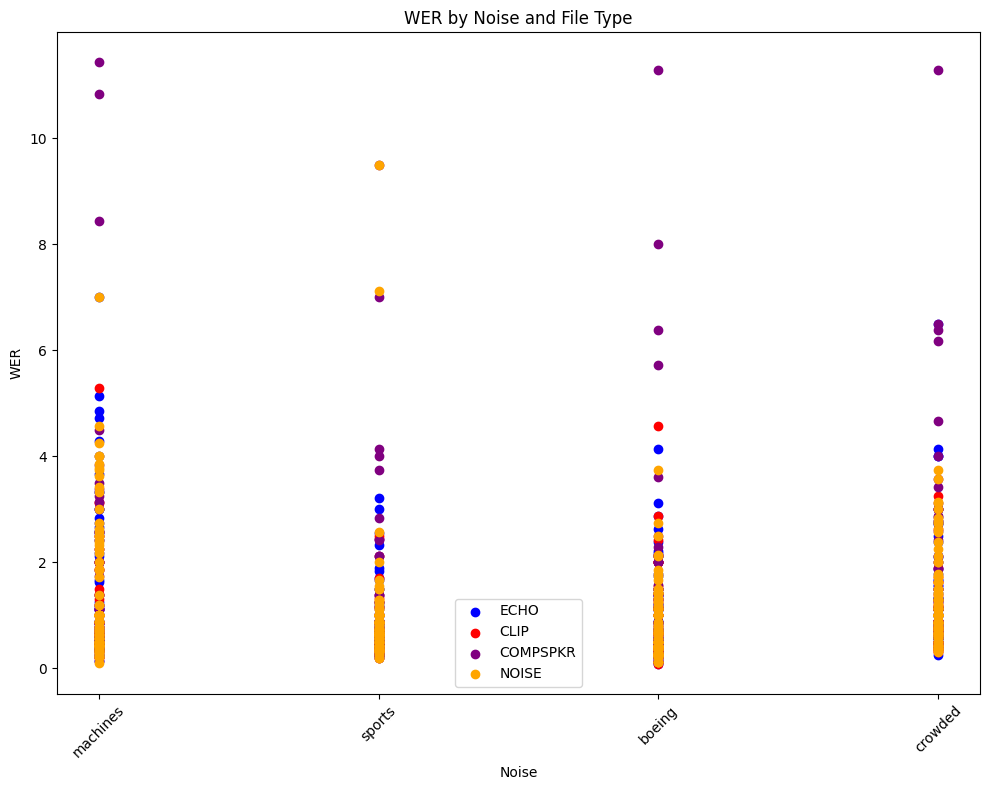

In [49]:
import matplotlib.pyplot as plt  # 导入matplotlib.pyplot

color_dict = {
    'ECHO': 'blue',
    'CLIP': 'red',
    'COMPSPKR': 'purple',
    'NOISE': 'orange'
}


# df = WER_result_before_fixed_separate.copy()
df = WER_result_fixed_separate_denoised.copy()

WER_THRESHOLD = 100

df['file_type'] = df['file'].apply(lambda x: x.split('_')[2])


fig, ax = plt.subplots(figsize=(10, 8))


for model in df.columns[1:-1]:  
    for file_type, color in color_dict.items():
        subset = df[(df['file_type'] == file_type) & (df[model] <= WER_THRESHOLD)]
        # subset = df[df['file_type'] == file_type]
        ax.scatter([model] * len(subset), subset[model], label=file_type, color=color_dict[file_type])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())


ax.set_xlabel('Noise')
ax.set_ylabel('WER')
ax.set_title('WER by Noise and File Type')


plt.xticks(rotation=45)  # Rotate model names for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


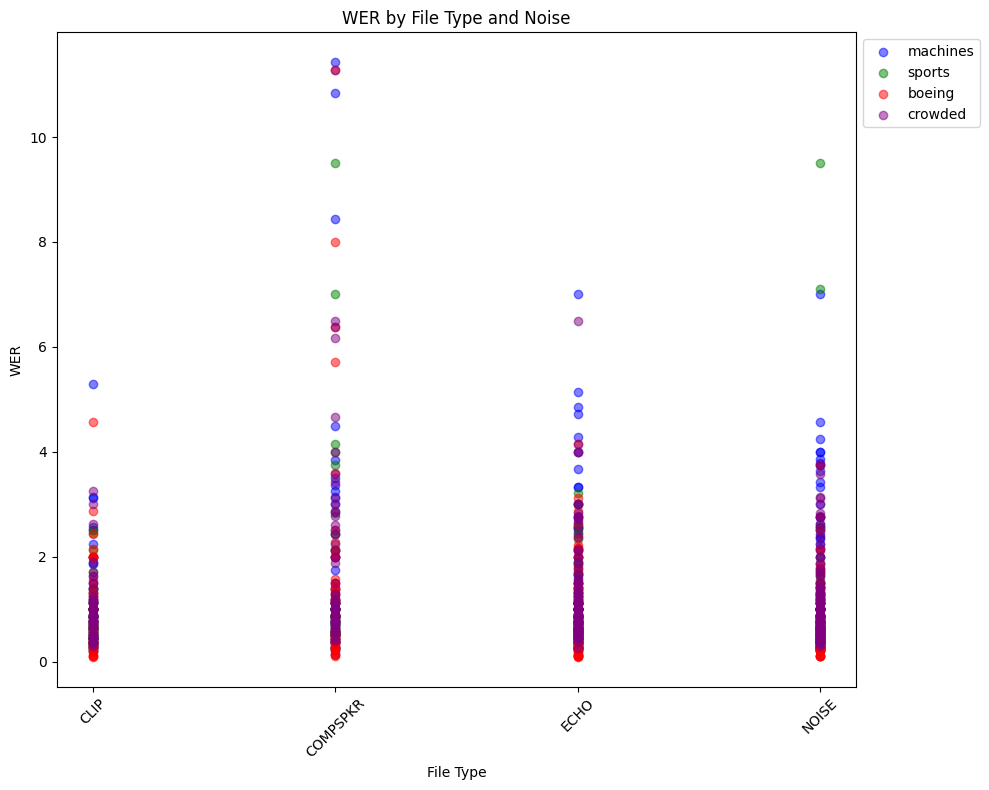

In [50]:
model_colors = {
    'machines': 'blue',
    'sports': 'green',
    'boeing': 'red',
    'crowded': 'purple'
}

fig, ax = plt.subplots(figsize=(10, 8))


grouped = df.groupby('file_type')
WER_THRESHOLD = 100


for file_type, group in grouped:
    
    for model in df.columns[1:-1]: 
        subset = group[group[model] <= WER_THRESHOLD]
        ax.scatter([file_type] * len(subset), subset[model], label=model, alpha=0.5, color=model_colors[model])
        # ax.scatter([file_type] * len(group), group[model], label=model, alpha=0.5, color=model_colors[model])


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))


ax.set_xlabel('File Type')
ax.set_ylabel('WER')
ax.set_title('WER by File Type and Noise')

plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


In [44]:
# ##################################
# ## This calculates WER for EACH .csv file of each model BEFORE any issues are solved(e.g. case sensitivity issue)  #
# ##################################
# from evaluate import load
# # WER_result_before_fixed_separate = computeWERdf_separate(dftranscriptions_all,['sst_speecht5_asr', 'stt_whisper-small', 'stt_whisper-base','stt_data2vec-audio-base', 'stt_wav2vec2-base'])
# WER_result_before_fixed_separate_denoised = computeWERdf_total(denoised_dftranscriptions_all,['machines', 'sports', 'boeing', 'crowded'])

# WER_result_before_fixed_separate_denoised

In [45]:
##################################
## This calculates WER for EACH .csv file of each model BEFORE any issues are solved(e.g. case sensitivity issue)  #
##################################
from evaluate import load
# WER_result_before_fixed_separate = computeWERdf_separate(dftranscriptions_all,['sst_speecht5_asr', 'stt_whisper-small', 'stt_whisper-base','stt_data2vec-audio-base', 'stt_wav2vec2-base'])
WER_result_after_fixed_separate_denoised = computeWERdf_total(issues_solved_WER_denoised,['machines', 'sports', 'boeing', 'crowded'])
WER_result_after_fixed_separate_denoised

,model,WER
0,machines,1.284546
1,sports,0.910057
2,boeing,0.928863
3,crowded,1.284137
